Michael Jordan


,Games played,Games started,Minutes per game,Field goal percentage,3-point field-goal percentage,Free-throw percentage,Rebounds per game,Assists per game,Steals per game,Blocks per game,Points per game
0,82.0,82.0,38.3,0.515,0.173,0.845,6.5,5.9,2.4,0.8,28.2
1,18.0,7.0,25.1,0.457,0.167,0.840,3.6,2.9,2.1,1.2,22.7
2,82.0,82.0,40.0,0.482,0.182,0.857,5.2,4.6,2.9,1.5,37.1
3,82.0,82.0,40.4,0.535,0.132,0.841,5.5,5.9,3.2,1.6,35.0
4,81.0,81.0,40.2,0.538,0.276,0.850,8.0,8.0,2.9,0.8,32.5


Kobe Bryant


,Games played,Games started,Minutes per game,Field goal percentage,3-point field-goal percentage,Free-throw percentage,Rebounds per game,Assists per game,Steals per game,Blocks per game,Points per game
0,71.0,6.0,15.5,0.417,0.375,0.819,1.9,1.3,0.7,0.3,7.6
1,79.0,1.0,26.0,0.428,0.341,0.794,3.1,2.5,0.9,0.5,15.4
2,50.0,50.0,37.9,0.465,0.267,0.839,5.3,3.8,1.4,1.0,19.9
3,66.0,62.0,38.2,0.468,0.319,0.821,6.3,4.9,1.6,0.9,22.5
4,68.0,68.0,40.9,0.464,0.305,0.853,5.9,5.0,1.7,0.6,28.5


Lebron James


,Games played,Games started,Minutes per game,Field goal percentage,3-point field-goal percentage,Free-throw percentage,Rebounds per game,Assists per game,Steals per game,Blocks per game,Points per game
0,79.0,79.0,39.5,0.417,0.290,0.754,5.5,5.9,1.6,0.7,20.9
1,80.0,80.0,42.4,0.472,0.351,0.750,7.4,7.2,2.2,0.7,27.2
2,79.0,79.0,42.5,0.480,0.335,0.738,7.0,6.6,1.6,0.8,31.4
3,78.0,78.0,40.9,0.476,0.319,0.698,6.7,6.0,1.6,0.7,27.3
4,75.0,74.0,40.4,0.484,0.315,0.712,7.9,7.2,1.8,1.1,30.0


kevin Durant


,Games played,Games started,Minutes per game,Field goal percentage,3-point field-goal percentage,Free-throw percentage,Rebounds per game,Assists per game,Steals per game,Blocks per game,Points per game
0,80.0,80.0,34.6,0.430,0.288,0.873,4.4,2.4,1.0,0.9,20.3
1,74.0,74.0,39.0,0.476,0.422,0.863,6.5,2.8,1.3,0.7,25.3
2,82.0,82.0,39.5,0.476,0.365,0.900,7.6,2.8,1.4,1.0,30.1
3,78.0,78.0,38.9,0.462,0.350,0.880,6.8,2.7,1.1,1.0,27.7
4,66.0,66.0,38.6,0.496,0.387,0.860,8.0,3.5,1.3,1.2,28.0


Magic Johnson


,Games played,Games started,Minutes per game,Field goal percentage,3-point field-goal percentage,Free-throw percentage,Rebounds per game,Assists per game,Steals per game,Blocks per game,Points per game
0,77.0,72.0,36.3,0.530,0.226,0.81,7.7,7.3,2.4,0.5,18.0
1,37.0,35.0,37.1,0.532,0.176,0.76,8.6,8.6,3.4,0.7,21.6
2,78.0,77.0,38.3,0.537,0.207,0.76,9.6,9.5,2.7,0.4,18.6
3,79.0,79.0,36.8,0.548,0.000,0.80,8.6,10.5,2.2,0.6,16.8
4,67.0,66.0,38.3,0.565,0.207,0.81,7.3,13.1,2.2,0.7,17.6


James Harden


,Games played,Games started,Minutes per game,Field goal percentage,3-point field-goal percentage,Free-throw percentage,Rebounds per game,Assists per game,Steals per game,Blocks per game,Points per game
0,76.0,0.0,22.9,0.403,0.375,0.808,3.2,1.8,1.1,0.3,9.9
1,82.0,5.0,26.7,0.436,0.349,0.843,3.1,2.1,1.1,0.3,12.2
2,62.0,2.0,31.4,0.491,0.390,0.846,4.1,3.7,1.0,0.2,16.8
3,78.0,78.0,38.3,0.438,0.368,0.851,4.9,5.8,1.8,0.5,25.9
4,73.0,73.0,38.0,0.456,0.366,0.866,4.7,6.1,1.6,0.4,25.4


Dwyane Wade


,Games played,Games started,Minutes per game,Field goal percentage,3-point field-goal percentage,Free-throw percentage,Rebounds per game,Assists per game,Steals per game,Blocks per game,Points per game
0,61.0,56.0,34.9,0.465,0.302,0.747,4.0,4.5,1.4,0.6,16.2
1,77.0,77.0,38.6,0.478,0.289,0.762,5.2,6.8,1.6,1.1,24.1
2,75.0,75.0,38.6,0.495,0.171,0.783,5.7,6.7,1.9,0.8,27.2
3,51.0,50.0,37.9,0.491,0.266,0.807,4.7,7.5,2.1,1.2,27.4
4,51.0,49.0,38.3,0.469,0.286,0.758,4.2,6.9,1.7,0.7,24.6


Anthony Davis


,Games played,Games started,Minutes per game,Field goal percentage,3-point field-goal percentage,Free-throw percentage,Rebounds per game,Assists per game,Steals per game,Blocks per game,Points per game
0,64.0,60.0,28.8,0.516,0.000,0.751,8.2,1.0,1.2,1.8,13.5
1,67.0,66.0,35.2,0.519,0.222,0.791,10.0,1.6,1.3,2.8,20.8
2,68.0,68.0,36.1,0.535,0.083,0.805,10.2,2.2,1.5,2.9,24.4
3,61.0,61.0,35.5,0.493,0.324,0.758,10.3,1.9,1.3,2.0,24.3
4,75.0,75.0,36.1,0.505,0.299,0.802,11.8,2.1,1.3,2.2,28.0


Paul George


,Games played,Games started,Minutes per game,Field goal percentage,3-point field-goal percentage,Free-throw percentage,Rebounds per game,Assists per game,Steals per game,Blocks per game,Points per game
0,61.0,19.0,20.7,0.453,0.297,0.762,3.7,1.1,1.0,0.4,7.8
1,66.0,66.0,29.7,0.440,0.385,0.802,5.6,2.4,1.6,0.6,12.1
2,79.0,79.0,37.6,0.419,0.362,0.807,7.6,4.1,1.8,0.6,17.4
3,80.0,80.0,36.2,0.424,0.364,0.864,6.8,3.5,1.9,0.3,21.7
4,6.0,0.0,15.2,0.367,0.409,0.727,3.7,1.0,0.8,0.2,8.8


Stephen Curry


,Games played,Games started,Minutes per game,Field goal percentage,3-point field-goal percentage,Free-throw percentage,Rebounds per game,Assists per game,Steals per game,Blocks per game,Points per game
0,80.0,77.0,36.2,0.462,0.437,0.885,4.5,5.9,1.9,0.2,17.5
1,74.0,74.0,33.6,0.480,0.442,0.934,3.9,5.8,1.5,0.3,18.6
2,26.0,23.0,28.2,0.490,0.455,0.809,3.4,5.3,1.5,0.3,14.7
3,78.0,78.0,38.2,0.451,0.453,0.900,4.0,6.9,1.6,0.2,22.9
4,78.0,78.0,36.5,0.471,0.424,0.885,4.3,8.5,1.6,0.2,24.0


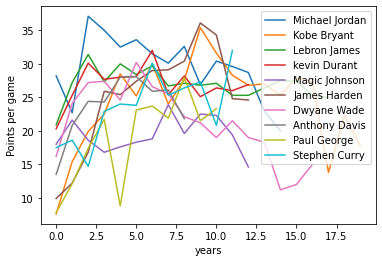

In [16]:
import bs4
import requests
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display

def get_basketball_stats(link='https://en.wikipedia.org/wiki/Michael_Jordan'):
  
    response = requests.get(link)
    soup = bs4.BeautifulSoup(response.text, 'html.parser')
    table = soup.find(class_='wikitable sortable')

    headers = table.tr
    titles = headers.find_all('abbr')
    data = {title['title']: [] for title in titles}

    for row in table.find_all('tr')[1:]:
        for key, a in zip(data.keys(),row.find_all('td')[2:]):
            data[key].append(''.join(c for c in a.text if (c.isdigit() or c == '.')))

        Min = min([len(x) for x in data.values()])
        for key in data.keys():
            data[key] = list(map(lambda x: float(x), data[key][:Min]))
    return data

links = ['https://en.wikipedia.org/wiki/Michael_Jordan'\
       ,'https://en.wikipedia.org/wiki/Kobe_Bryant'\
      ,'https://en.wikipedia.org/wiki/LeBron_James'\
      ,'https://en.wikipedia.org/wiki/Kevin_Durant'\
      ,'https://en.wikipedia.org/wiki/Magic_Johnson'\
      ,'https://en.wikipedia.org/wiki/James_Harden'\
      ,'https://en.wikipedia.org/wiki/Dwyane_Wade'\
      ,'https://en.wikipedia.org/wiki/Anthony_Davis'\
      ,'https://en.wikipedia.org/wiki/Paul_George'\
      ,'https://en.wikipedia.org/wiki/Stephen_Curry']
names = ['Michael Jordan','Kobe Bryant','Lebron James','kevin Durant','Magic Johnson','James Harden','Dwyane Wade','Anthony Davis','Paul George','Stephen Curry']

Michael_jordan_dict = get_basketball_stats(links[0])
kobe_bryant_dict = get_basketball_stats(links[1])
lebron_james_dict = get_basketball_stats(links[2])
Kevin_Durant_dict = get_basketball_stats(links[3])
Magic_Johnson_dict = get_basketball_stats(links[4])
James_Harden_dict = get_basketball_stats(links[5])
Dwyane_Wade_dict = get_basketball_stats(links[6])
Anthony_Davis_dict = get_basketball_stats(links[7])
Paul_George_dict = get_basketball_stats(links[8])
stephen_curry_dict = get_basketball_stats(links[9])

mj_table = pd.DataFrame(michael_jordan_dict)
kb_table = pd.DataFrame(kobe_bryant_dict)
lj_table = pd.DataFrame(lebron_james_dict)
kd_table = pd.DataFrame(Kevin_Durant_dict)
maj_table = pd.DataFrame(Magic_Johnson_dict)
jh_table = pd.DataFrame(James_Harden_dict)
dw_table = pd.DataFrame(Dwyane_Wade_dict)
ad_table = pd.DataFrame(Anthony_Davis_dict)
pg_table = pd.DataFrame(Paul_George_dict)
sc_table = pd.DataFrame(stephen_curry_dict)

list_table =[mj_table, kb_table, lj_table,kd_table,maj_table,jh_table,dw_table,ad_table,pg_table, sc_table]

i = 0
for name in names:
    print(name)
    display(list_table[i].head())
    i += 1

j = 0
for name in names:
    plt.plot(list_table[j][['Points per game']],label=name)
    plt.legend()
    plt.xlabel('years')
    plt.ylabel('Points per game')

    j += 1

csv_name = 'MJ1.csv'
mj_table.to_csv(csv_name)